In [5]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
%matplotlib inline
plt.style.use("seaborn")

In [6]:
y, X, ids = load_csv_data('data/train.csv' )
X.shape

(250000, 30)

In [7]:
features=['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt','DER_pt_ratio_lep_tau','DER_met_phi_centrality','DER_lep_eta_centrality','PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi','PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt']

In [8]:
to_remove = []
for feature in range(len(X[0])):
    values = X[:,feature]
    missing_ratio = 1-np.sum(values>-999)/len(values)
    print("Ratio of missing values for feature {} : {}".format(features[feature],missing_ratio))
    if (missing_ratio>0.5):
        to_remove.append(feature)
print("Features to remove from dataset :")
for f in to_remove:
    print(features[f])

Ratio of missing values for feature DER_mass_MMC : 0.15245600000000004
Ratio of missing values for feature DER_mass_transverse_met_lep : 0.0
Ratio of missing values for feature DER_mass_vis : 0.0
Ratio of missing values for feature DER_pt_h : 0.0
Ratio of missing values for feature DER_deltaeta_jet_jet : 0.709828
Ratio of missing values for feature DER_mass_jet_jet : 0.709828
Ratio of missing values for feature DER_prodeta_jet_jet : 0.709828
Ratio of missing values for feature DER_deltar_tau_lep : 0.0
Ratio of missing values for feature DER_pt_tot : 0.0
Ratio of missing values for feature DER_sum_pt : 0.0
Ratio of missing values for feature DER_pt_ratio_lep_tau : 0.0
Ratio of missing values for feature DER_met_phi_centrality : 0.0
Ratio of missing values for feature DER_lep_eta_centrality : 0.709828
Ratio of missing values for feature PRI_tau_pt : 0.0
Ratio of missing values for feature PRI_tau_eta : 0.0
Ratio of missing values for feature PRI_tau_phi : 0.0
Ratio of missing values for 

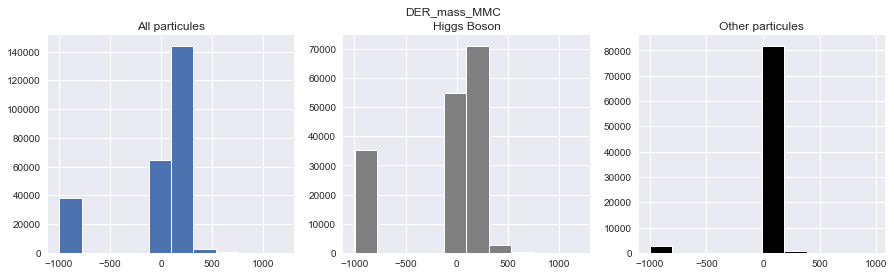

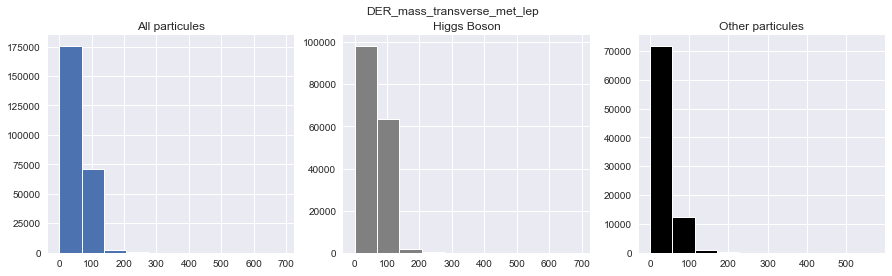

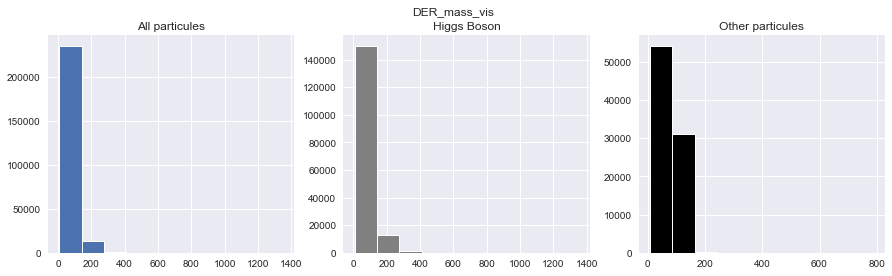

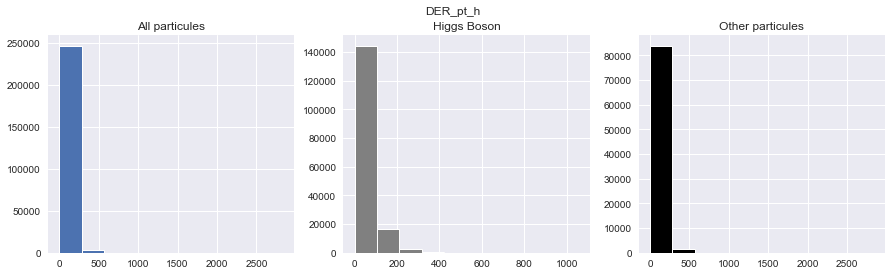

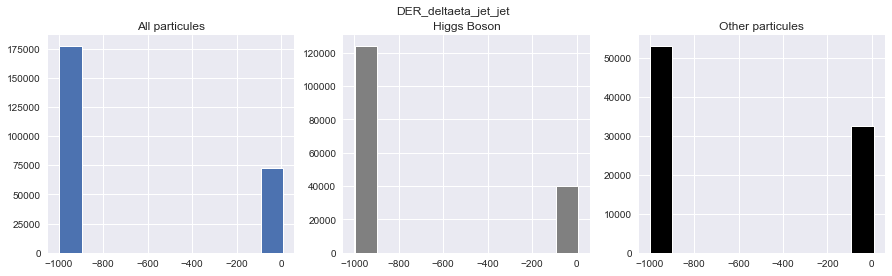

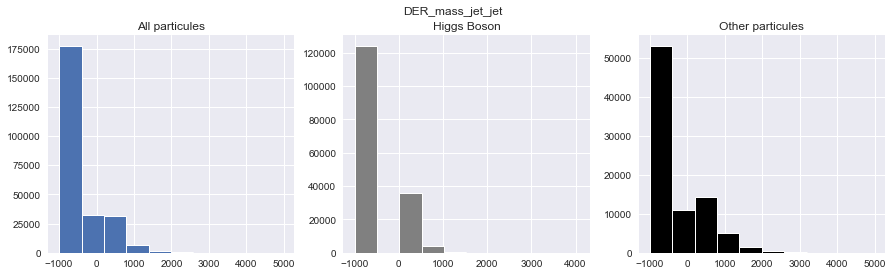

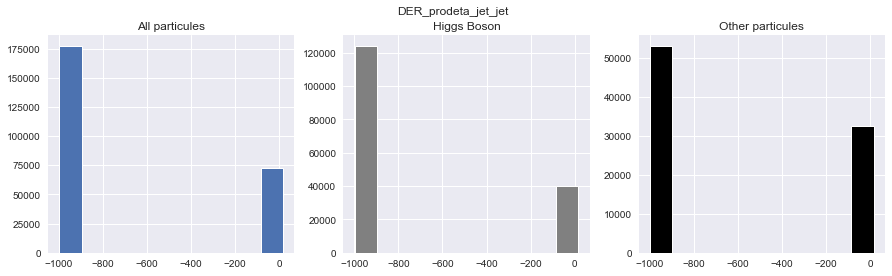

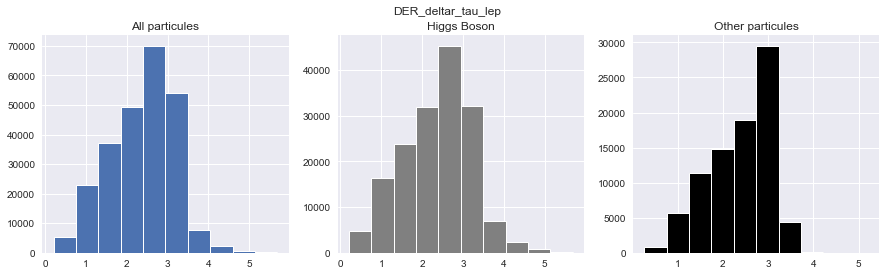

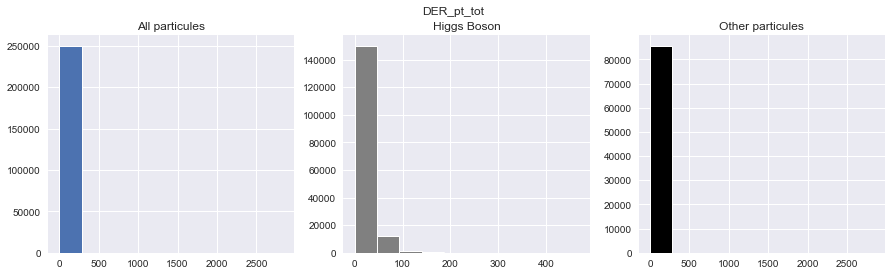

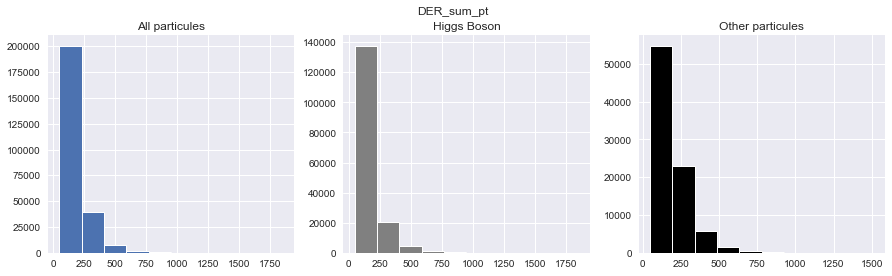

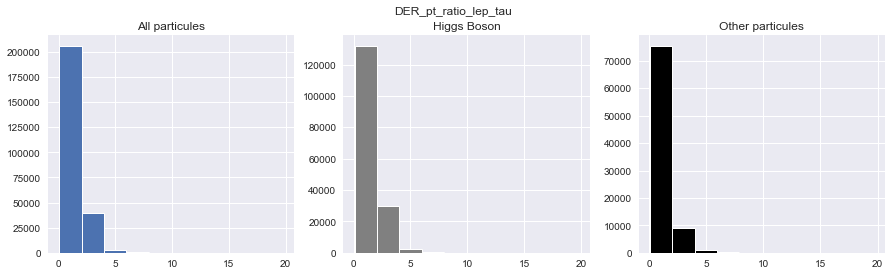

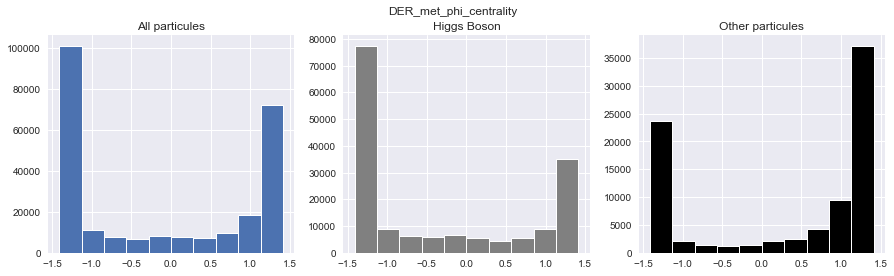

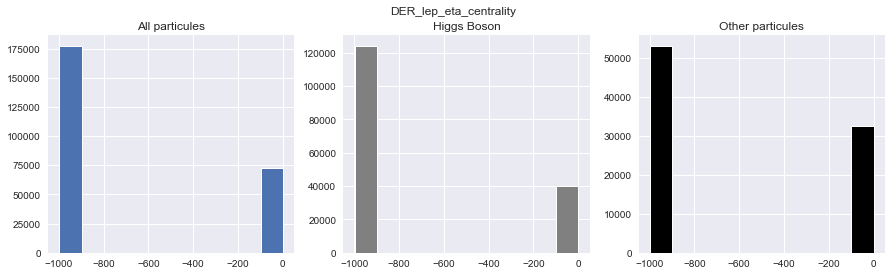

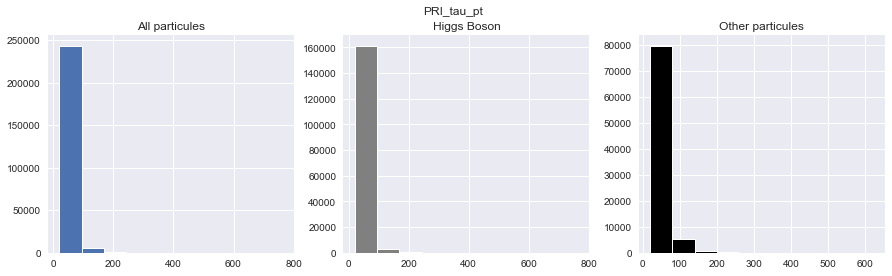

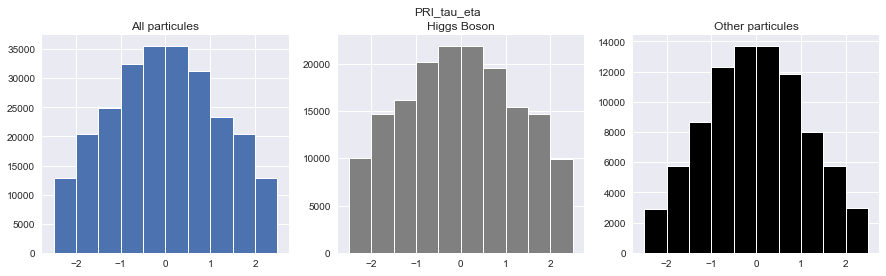

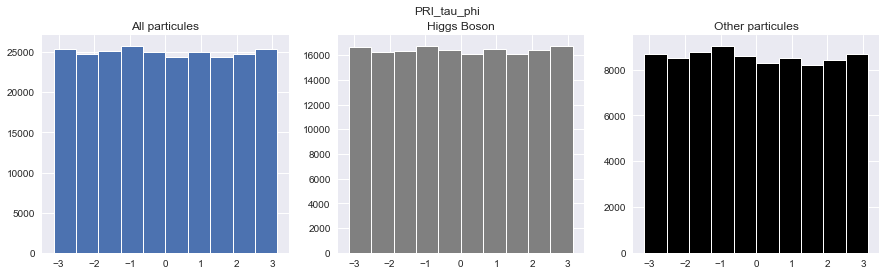

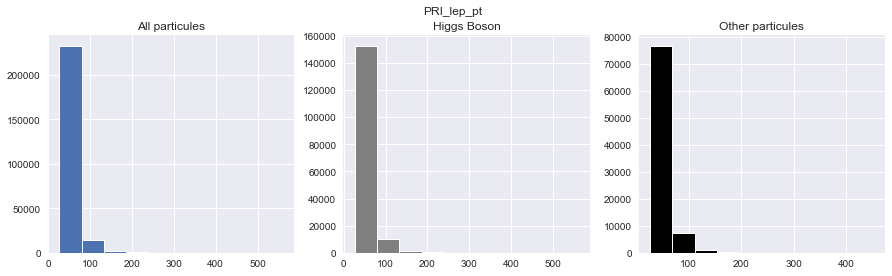

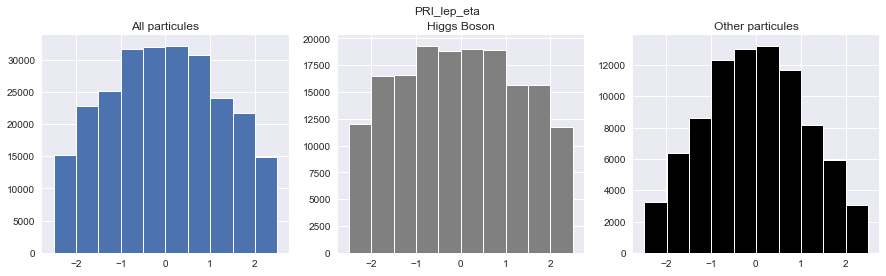

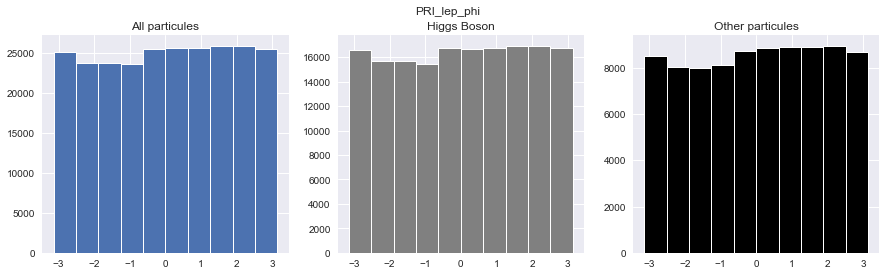

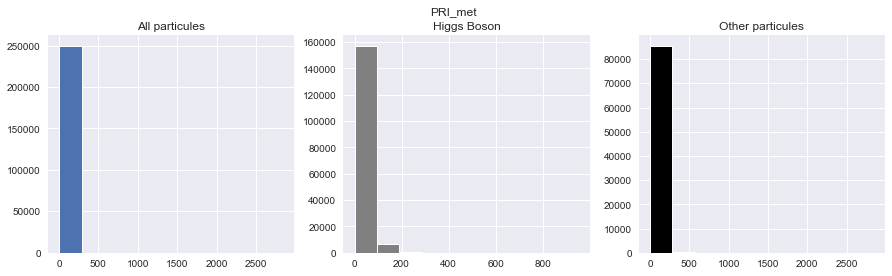

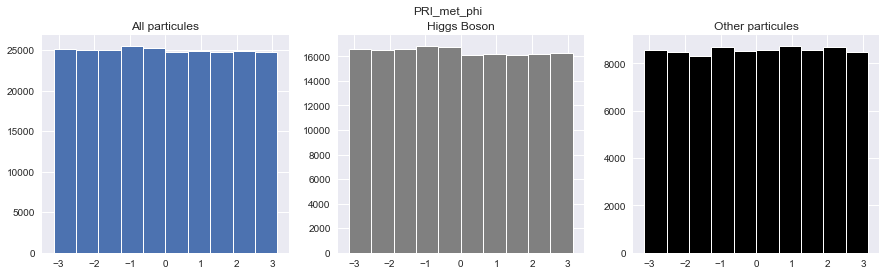

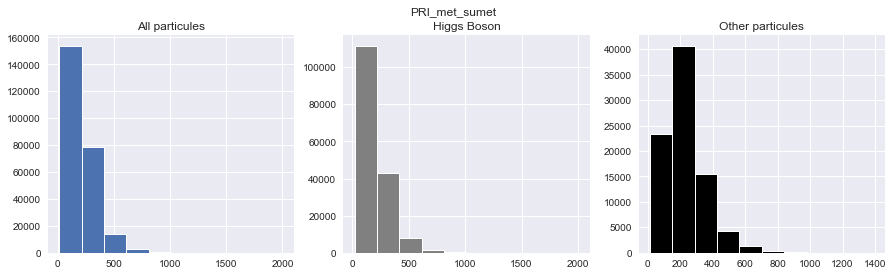

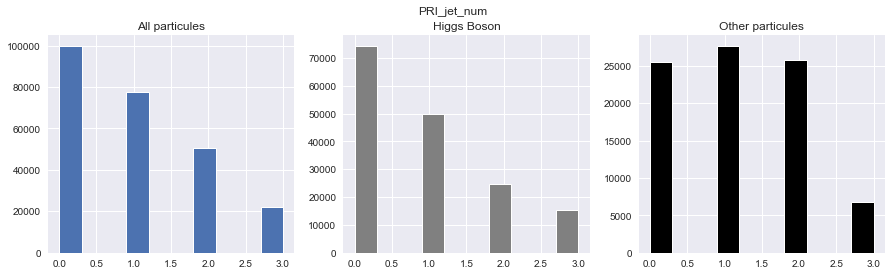

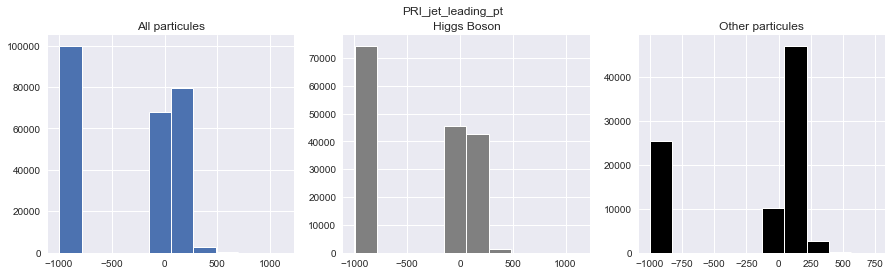

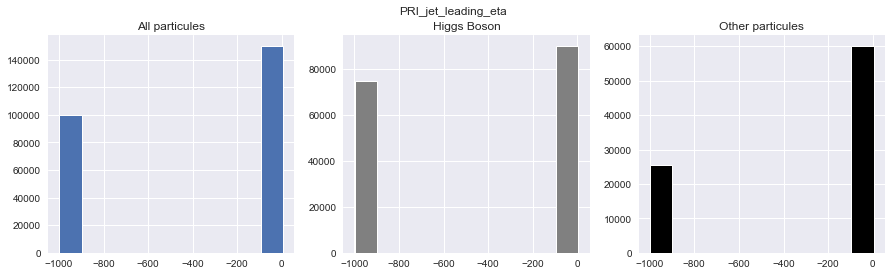

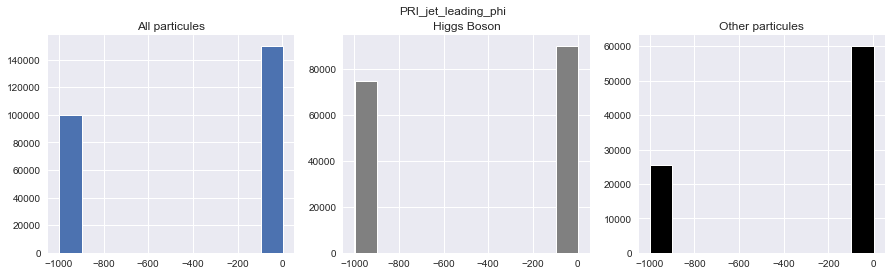

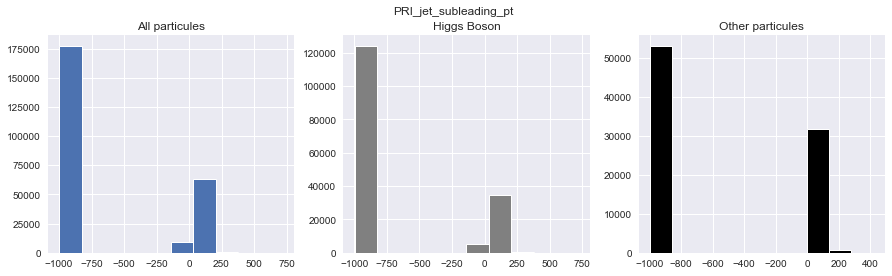

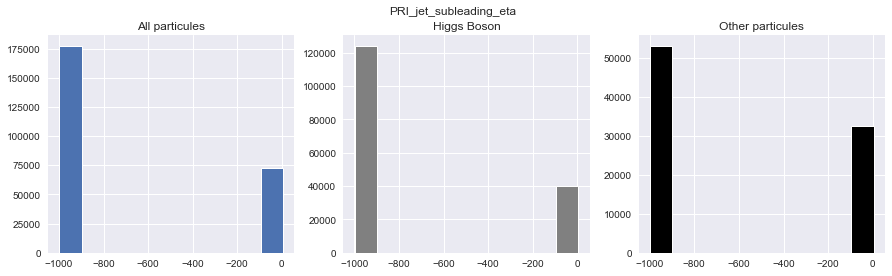

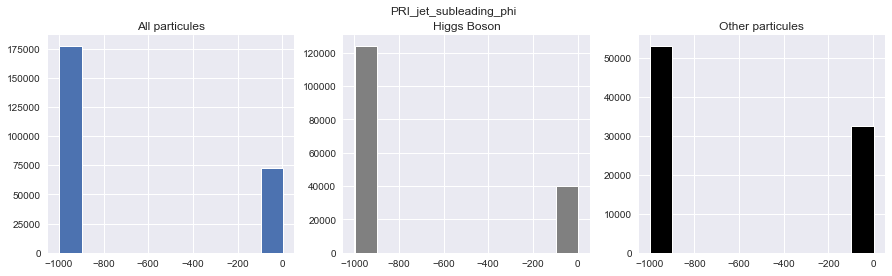

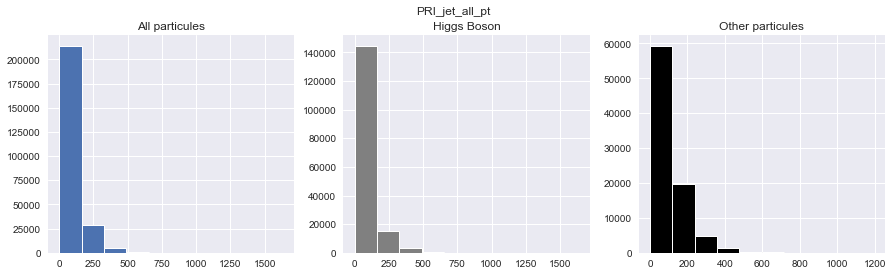

In [9]:
def feature_plot(feature, title,y, keep_missing_values=True):
    
    mask = np.full(len(y), keep_missing_values, dtype=bool) | (X[:,feature]>-990)
    fig, axs = plt.subplots(1, 3,figsize=(15,4))
    
    axs[0].set_title('All particules')
    axs[1].set_title('Higgs Boson')
    axs[2].set_title('Other particules')
    
    axs[0].hist(X[mask,feature],edgecolor='white', linewidth=1)
    axs[1].hist(X[np.logical_and(y==-1, mask),feature], color='grey',edgecolor='white', linewidth=1)
    axs[2].hist(X[np.logical_and(y==1, mask),feature], color='black',edgecolor='white', linewidth=1)

    plt.suptitle(title)
    plt.show()

for feature in range(X.shape[1]):
    feature_plot(feature,features[feature],y)

In [10]:
# Remove columns with too many missing values
X=np.delete(X,obj=to_remove,axis=1)
features=np.delete(features,obj=to_remove,axis=0)
X.shape

(250000, 23)

In [23]:
cors=[]

for feature in range(X.shape[1]):
    values=X[:,feature]
    missing_mask = values>-999
    cors.append(np.corrcoef(values[missing_mask],y[missing_mask])[1][0])
cors

[0.011614593198563054,
 -0.351427955861675,
 -0.014055273784852506,
 0.19252632856874793,
 0.012245481285482902,
 -0.015287426687781415,
 0.15323593247581346,
 -0.19539789618287817,
 0.2717518770516494,
 0.23523797587836723,
 -0.0009432510582117488,
 -0.0044025386863883985,
 -0.031947586805348205,
 0.0015162353770597238,
 0.004125447411524851,
 0.02246575151078583,
 0.007475342188590238,
 0.1355202615226846,
 0.13354912308169137,
 0.1094257748473156,
 0.0003076359576570627,
 -0.0002207581276670413,
 0.134295726669253]

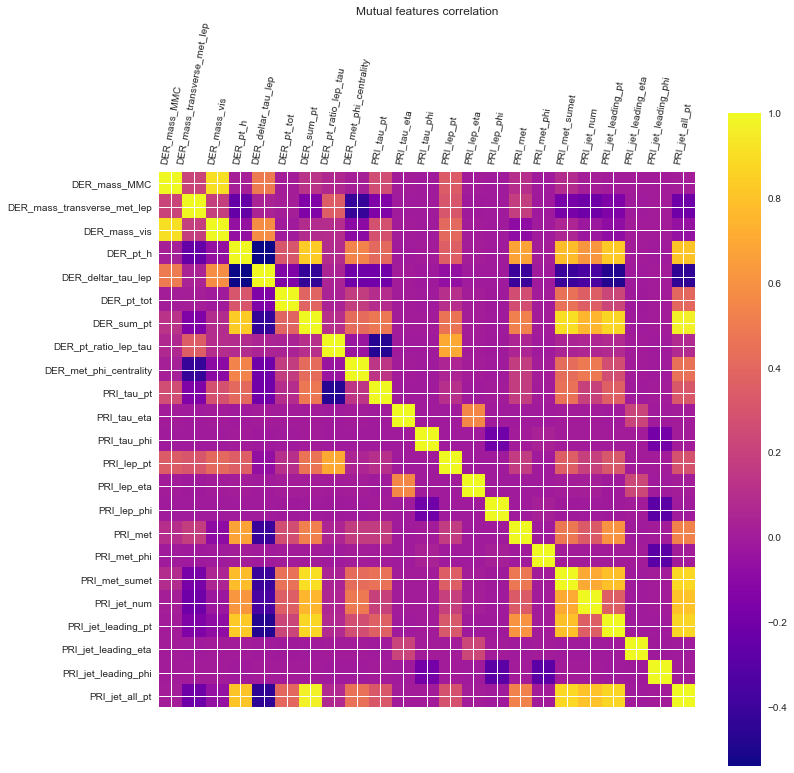

In [47]:
mutual_correlation = []

for feature1 in range(X.shape[1]):
    feature1_correlations = []
    for feature2 in range(X.shape[1]):
        feature1_values , feature2_values = X[:,feature1], X[:,feature2]
        mask = (feature1_values > -999) & (feature2_values > -999)
        correlation = np.corrcoef(feature1_values[mask],feature2_values[mask])[1][0]
        feature1_correlations.append(correlation)
    mutual_correlation.append(feature1_correlations)

plt.figure(figsize=(12,12))
plt.matshow(mutual_correlation,fignum=0,cmap='plasma')
plt.title("Mutual features correlation")
plt.xticks(ticks=[x for x in range(X.shape[1])],labels=features,rotation=80)
plt.yticks(ticks=[x for x in range(X.shape[1])],labels=features)
plt.colorbar()
plt.show()

In [50]:
t=0.8
features_to_delete=[]
for feature1_index in range(np.shape(mutual_correlation)[1]):
    for feature2_index in range(np.shape(mutual_correlation)[0]):
            corr=mutual_correlation[feature1_index][feature2_index]
            if np.abs(corr)>t and feature1_index>feature2_index:
                features_to_delete.append(feature2_index)

features_to_delete=np.unique(features_to_delete)
features_to_delete

array([ 0,  3,  6, 17, 18, 19])